In [2]:
from BasisFilter import BasisFilter
import pandas as pd
import os
import copy
import numpy as np
import re

In [3]:
BF = BasisFilter()

In [4]:
basis = BF.load_basis()

C:\Users\howsr\workspace\1_DataPreprocessing\basis\code\박민정원장님\BasisFilter.py:36: DtypeWarning: Columns (2,69,70,71,72,99,100,101,102,129,130,131,132,159,160,161,162,189,190,191,192,219,220,221,222,249,250,251,252,279,280,281,282,309,310,311,312,339,340,341,342,369,370,371,372,399,400,401,402,429,430,431,432,459,460,461,462,489,490,491,492,519,520,521,522,549,550,551,552,579,580,581,582,609,610,611,612,639,640,641,642,669,670,671,672,699,700,701,702,729,730,731,732,759,760,761,762,789,790,791,792) have mixed types. Specify dtype option on import or set low_memory=False.
  self.basis = pd.read_csv(f'{self.path}\\MergeRegionData\\basis_for_filter.csv', encoding='utf-8')


In [5]:
first_df = BF.first_visit_filter(basis)

In [6]:
#BF.save_excel(first_df, '초진 basis')

In [7]:
BF.path

'C:\\Users\\howsr\\workspace\\1_DataPreprocessing\\basis'

In [8]:
progress_info_df = pd.read_csv(f'{BF.path}//filtered_data//progress_info.csv')

C:\Users\howsr\AppData\Local\Temp\ipykernel_30448\353289368.py:1: DtypeWarning: Columns (267,268,295,296,297,298,325,326,327,328,355,356,357,358,385,386,387,388,415,416,417,418,445,446,447,448,475,476,477,478,505,506,507,508,535,536,537,538,565,566,567,568,595,596,597,598,625,626,627,628,655,656,657,658,685,686,687,688,715,716,717,718,745,746,747,748,775,776,777,778,805,806,807,808) have mixed types. Specify dtype option on import or set low_memory=False.
  progress_info_df = pd.read_csv(f'{BF.path}//filtered_data//progress_info.csv')


In [9]:
progress_info_df.shape

(44829, 835)

In [10]:
progress_info_fat = progress_info_df[progress_info_df['BMI'] >= 23]
progress_info_fat.shape

(33957, 835)

In [12]:
progress_info_adult = progress_info_fat[progress_info_fat['Age'] > 18]

In [13]:
progress_info_adult = progress_info_adult[progress_info_adult['PatientFirstDate'] < '2024-01-31']
progress_info_adult.shape

(26858, 835)

In [37]:
len(progress_info_adult), len(progress_info_adult[progress_info_adult['Visit'] == 1]), len(progress_info_adult[progress_info_adult['Visit'] == 2])

(26858, 17780, 9078)

In [38]:
FirstVisitDf = progress_info_adult.iloc[:,:25]

In [39]:
FirstVisitDf['Coffee'].fillna(value='기타', inplace=True)

# Step 1: 'Coffee' 열의 값 개수 확인
value_counts = FirstVisitDf['Coffee'].value_counts()
# Step 2: 20보다 작은 항목에 대해 문자열 변경
def replace_values(value):
    if value_counts[value] < 10000:
        if '없음' in value:
            return '없음'
        elif '있음' in value:
            return '있음'
        elif '마시지않음' in value:
            return '마시지않음'
        else:
            return '기타'
    return value


FirstVisitDf['Coffee'] = FirstVisitDf['Coffee'].apply(replace_values)
FirstVisitDf = pd.get_dummies(FirstVisitDf, columns=['Coffee'], dtype=int)

# Step 2: 20보다 작은 항목에 대해 문자열 변경
def replace_values(value):
    if value_counts[value] < 1000:
        if '1회' in value:
            return '주 1회'
        elif '2회' in value:
            return '주 2회 이상'
        else:
            return '기타'
    return value

FirstVisitDf['Alcohol'].fillna(value = '기타', inplace=True)
value_counts = FirstVisitDf['Alcohol'].value_counts()
FirstVisitDf['Alcohol'] = FirstVisitDf['Alcohol'].apply(replace_values)

# Step 4: 20보다 큰 항목에 대해 원핫 인코딩
FirstVisitDf = pd.get_dummies(FirstVisitDf, columns=['Alcohol'], dtype=int)

In [40]:
FirstVisitDf['HanbangX'] =FirstVisitDf['한방 경험'].apply(lambda x: 1 if x == 0 else 0)
FirstVisitDf['HanbangYX'] = FirstVisitDf.apply(lambda row: 1 if row['한방 경험'] == 1 and row['한방 불편증상 여부'] == 0 else 0, axis=1)
FirstVisitDf['HanbangYY'] = FirstVisitDf.apply(lambda row: 1 if row['한방 경험'] == 1 and row['한방 불편증상 여부'] == 1 else 0, axis=1)
FirstVisitDf['YangbangX'] =FirstVisitDf['양방 경험'].apply(lambda x: 1 if x == 0 else 0)
FirstVisitDf['YangbangYX'] = FirstVisitDf.apply(lambda row: 1 if row['양방 경험'] == 1 and row['양방 불편증상 여부'] == 0 else 0, axis=1)
FirstVisitDf['YangbangYY'] = FirstVisitDf.apply(lambda row: 1 if row['양방 경험'] == 1 and row['양방 불편증상 여부'] == 1 else 0, axis=1)

In [41]:
info_df = FirstVisitDf

In [16]:
info_df

,Region,PatientID,PatientChartNo,PatientName,PatientAddr11,PatientFirstDate,Age,PatientSex,Description,ProgressNote,...,Alcohol_거의 마시지 않는다 (월 1-2회),Alcohol_기타,Alcohol_주 1회,Alcohol_주 2회 이상,HanbangX,HanbangYX,HanbangYY,YangbangX,YangbangYX,YangbangYY
1,bundang,4214,116324.0,강기택,"경기도 광주시 태봉로 110(태전동, 태전아이파크)",2022-11-28,43.0,1,"S,J/내원경로 윤수비(잠69211/핸5242)",#비만\n\n남자\n\nㆍ 키/체중/BMI:178 / 102 / 중도 비만(32.1...,...,0,0,0,1,1,0,0,1,0,0
5,bundang,11692,118233.0,박수진,"경기도 성남시 수정구 수정로 80(수진동, 우리빌)",2023-03-13,43.0,2,NaN,#비만\n\n여자\n\nㆍ 키/체중/BMI:160 / 83 / 중도 비만(32.42...,...,1,0,0,0,1,0,0,0,0,1
6,bundang,11966,120674.0,박명희,"경기도 하남시 덕풍동로 60 (덕풍동, 참아름)",2023-06-27,38.0,2,비대면,#비만\n\n여자\n\nㆍ 키/체중/BMI:166 / 74 / 경도비만(26.854...,...,0,0,0,1,0,0,1,0,0,1
7,bundang,14814,119208.0,김유진,"경기도 성남시 분당구 수내로 201 (분당동, 샛별마을삼부아파트)",2023-04-21,34.0,2,내원경로 김수경(홍60629/핸8990),#비만\n\n여자\n\nㆍ 키/체중/BMI:164 / 63 / 과체중(23.4235...,...,0,0,1,0,0,0,1,0,0,1
8,bundang,15286,120123.0,최민정,"경기도 성남시 중원구 여수울로 51 (여수동, 산들마을)",2023-06-02,60.0,2,NaN,#비만\n\n여자\n\nㆍ 키/체중/BMI:160 / 67 / 경도비만(26.171...,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43920,incheon,15240,2870.0,허정세,"경기도 화성시 동탄순환대로30길 8 (영천동, 동탄퍼스트파크)",2024-01-29,40.0,1,비대면,#비만(비대면초진) (18:00 부재중 > 18:05 부재중 > 18:10 전화돌림...,...,0,0,1,0,0,1,0,1,0,0
43922,incheon,15281,2861.0,용나원,인천광역시 남동구 남동대로 776 (구월동),2024-01-30,53.0,2,NaN,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:165 / 70 / 경도비만(...,...,1,0,0,0,0,0,1,0,0,1
43923,incheon,15295,2862.0,이현진,인천광역시 연수구 새말로 91 (연수동),2024-01-30,26.0,2,NaN,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:160 / 83 / 중도 비만...,...,1,0,0,0,1,0,0,0,0,1
43924,incheon,15306,2860.0,홍은숙,인천광역시 남동구 인하로 485 (구월동),2024-01-30,57.0,2,부천38129,# 비만(전화접수) - 지점이동 \n\n[건강상태 변화 체크리스트]\n⑴ 임신 / ...,...,0,0,0,1,0,0,1,1,0,0


In [17]:
progress_info_adult.shape, FirstVisitDf.shape

((26858, 835), (26858, 37))

In [18]:
date_col = [col for col in progress_info_adult.columns if 'Date' in col]
for col in date_col:
    #print(progress_info_adult[col])
    progress_info_adult[col] = pd.to_datetime(progress_info_adult[col])
    
def extract_weight(text):
    if pd.isna(text):
        return None
    # 정규 표현식 패턴
    pattern =  r'체\s*중\s*:\s*(?:\(\s*)?(\d+(\.\d+)?)\s*(?:\))?'
    # 텍스트에서 체중 추출
    match = re.search(pattern, text)
    if match:
        weight = match.group(1)
        return float(weight)
    else:
        return None
 

In [20]:
from datetime import datetime, timedelta
medicine_dict = {}
weight_dict = {}
nan=''

for idx in progress_info_adult.index:
    num = int(progress_info_adult.loc[idx,'N'])
    Date = f'Date_{num}'
    first_date = progress_info_adult.loc[idx,Date]
    limit_date = first_date + timedelta(days=120)
    med_list = {}
    weight_list = {}
    weight_list[Date] = [progress_info_adult.loc[idx, 'Weight'], progress_info_adult.loc[idx, 'Visit']]
    #print(weight_list)
    while True:
        Date = f'Date_{num}'
        MedicineName = f'MedicineName_{num}'
        Memo = f'Memo_{num}'
        ProgressNote = f'ProgressNote_{num}'
        Weight = f'Weight_{num}'
        num += 1
        if limit_date < progress_info_adult.loc[idx,Date]:
            break
        if limit_date < progress_info_adult.loc[idx,Date]:
            break
        if num >= 27:
            break
        if pd.isna(progress_info_adult.loc[idx,Date]):
            continue
        med_set = []
        memo_set = []
        if not pd.isna(progress_info_adult.loc[idx,MedicineName]):
            Medicine_list = eval(progress_info_adult.loc[idx,MedicineName])
            Memo_list = eval(progress_info_adult.loc[idx,Memo])
            for j, medicine in enumerate(Medicine_list):
                if 'Gambi' in medicine:
                    if 'Tab' in medicine:
                        med_set.append(medicine)
                        memo_set.append(Memo_list[j])
            med_list[Date] = [med_set, memo_set]

        if num == progress_info_adult.loc[idx,'N']+1:
            continue
        elif pd.isna(progress_info_adult.loc[idx,Weight]):
            W = extract_weight(progress_info_adult.loc[idx,ProgressNote])
            visit = 2
            if W == None:
                visit = 0
        else:
            W = progress_info_adult.loc[idx,Weight]
            visit = 1
        weight_list[Date] = [W,visit]

    if len(med_list) != 0:
        medicine_dict[idx] = med_list 
        weight_dict[idx] = weight_list 
  

In [21]:
df = progress_info_adult[progress_info_adult.index.isin(medicine_dict.keys())]

In [22]:
df.shape

(25649, 835)

In [23]:
df = df.reset_index(drop=True)

In [24]:
idx_list=[]
target_dict ={}
visit_dict = {}
date_dict3 ={}
time_dict3 ={}
for idx in weight_dict.keys():
    df1 = pd.DataFrame(medicine_dict[idx])
    df2 = pd.DataFrame(weight_dict[idx])
    df3 = pd.concat([df2,df1]).reset_index(drop = True)
    progress_info_adult.loc[idx,df3.columns.tolist()]
    #print(pd.DataFrame(progress_info_adult.loc[idx,df3.columns.tolist()]).transpose())
    df4=pd.concat([pd.DataFrame(progress_info_adult.loc[idx,df3.columns.tolist()]).transpose(),df3], axis =0).reset_index(drop = True)
    #df4 = df4.sort_index(axis=1)
    # 0 날짜, 1 체중, 2 방문, 3 약, 4 메모
    df4.loc[4].fillna(0, inplace = True)
    Dates = df4.columns.tolist()
    one, two = False, False
    after_Dates = []
    visit_list = []
    date_list = []
    time_list = []
    for i, memos in enumerate(df4.loc[4]):
        if memos==0:
            continue
        if '2-1' in memos:
            if not one :
                one = True
                visit_list.append(df4.loc[2,Dates[i]])
                date_list.append(Dates[i])
                time_list.append(df4.loc[0,Dates[i]])                
        if '2-2' in memos:
            if one:
                two = True
                visit_list.append(df4.loc[2,Dates[i]])
                date_list.append(Dates[i])
                time_list.append((df4.loc[0,Dates[i]]-time_list[0]).days)
            after_Dates =Dates[i:]
        if '2-1,2' in memos:
            one = True
            two = True
            time_list.append(df4.loc[0,Dates[i]])
            time_list.append((df4.loc[0,Dates[i]]-time_list[0]).days)
            visit_list.append(df4.loc[2,Dates[i]])
            visit_list.append(df4.loc[2,Dates[i]])
            date_list.append(Dates[i])
            after_Dates =Dates[i:]
        if one and two:
            break
    if not (one and two):
        continue
    if len(after_Dates) < 2:
        continue
    for j in range(1,len(after_Dates)):
        # 약을 2번에 나눠서 받은경우 30일 이후 방문
        if len(date_list) == 2:
            if df4.loc[0,after_Dates[0]]+ timedelta(days=14) > df4.loc[0,after_Dates[j]]:
                continue
        # 약을 1번에 나눠서 받은경우 60일 이후 방문
        elif len(date_list) == 1:
            if df4.loc[0,after_Dates[0]]+ timedelta(days=30) > df4.loc[0,after_Dates[j]]:
                continue
                
        if df4.loc[0,Dates[0]] + timedelta(days=120) < df4.loc[0,after_Dates[j]]:
            break
        
        if df4.loc[2,after_Dates[j]] == 1.0 or df4.loc[2,after_Dates[j]] == 2.0:
            W = df4.loc[1,after_Dates[j]]
        else:
            continue
            
        if not pd.isna(W):
            date_list.append(after_Dates[j])
            time_list.append((df4.loc[0,after_Dates[j]]-time_list[0]).days)
            visit_list.append(df4.loc[2,after_Dates[j]])
            visit_dict[idx] = visit_list
            target_dict[idx] = df4
            date_dict3[idx] = date_list
            time_dict3[idx] = time_list

target_dict3 = target_dict
visit_dict3 = visit_dict
            
            

In [17]:
target_dict3
visit_dict3

NameError: name 'target_dict3' is not defined

In [25]:
allvisit_dict3 = {key: value for key, value in visit_dict3.items() if value.count(1) > 2}
len(allvisit_dict3), len(visit_dict3)

(2906, 8467)

In [27]:
len(allvisit_dict3)

{16: [1.0, 1.0, 2.0, 1.0],
 34: [1.0, 1.0, 2.0, 1.0, 1.0],
 55: [1.0, 1.0, 2.0, 1.0],
 67: [1.0, 1.0, 1.0],
 68: [1.0, 1.0, 1.0, 1.0],
 86: [1.0, 1.0, 1.0],
 107: [1.0, 1.0, 1.0],
 143: [1.0, 1.0, 1.0],
 145: [1.0, 1.0, 1.0, 1.0],
 209: [1.0, 1.0, 1.0],
 212: [1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0],
 411: [1.0, 1.0, 1.0],
 537: [1.0, 1.0, 1.0],
 588: [1.0, 1.0, 1.0, 1.0],
 647: [1.0, 1.0, 1.0],
 663: [1.0, 1.0, 1.0],
 673: [1.0, 1.0, 1.0],
 708: [1.0, 1.0, 1.0],
 813: [1.0, 1.0, 1.0, 1.0],
 814: [1.0, 2.0, 1.0, 1.0],
 924: [1.0, 1.0, 1.0],
 1036: [1.0, 1.0, 1.0],
 1054: [1.0, 1.0, 1.0],
 1221: [1.0, 1.0, 1.0],
 1379: [1.0, 1.0, 1.0],
 1403: [1.0, 1.0, 1.0],
 1548: [1.0, 1.0, 1.0],
 1550: [1.0, 1.0, 1.0],
 1585: [1.0, 1.0, 1.0, 1.0, 2.0],
 1596: [1.0, 1.0, 1.0],
 1678: [1.0, 1.0, 1.0],
 1838: [1.0, 1.0, 1.0, 2.0],
 1886: [1.0, 1.0, 1.0],
 1892: [0.0, 1.0, 1.0, 1.0],
 1912: [1.0, 1.0, 1.0],
 1934: [1.0, 1.0, 1.0],
 1938: [1.0, 1.0, 1.0],
 1943: [1.0, 1.0, 1.0],
 1953: [1.0, 1.0, 1.0],
 1971:

In [28]:
memo_dict ={}
period_dict = {}
df_dict = {}
rememo_list = [['2-1'],['2-1', '2-2'],['2-1,2']]

for idx in allvisit_dict3.keys():
    imsi = target_dict3[idx]
    imsi = imsi.loc[:, imsi.iloc[2] == 1.0]    
    period = []
    for i, date in enumerate(imsi.loc[0]):
        if i == 0:
            first = date
        else:
            period.append((date-first).days)

    if period[-1] < 60:
        continue
        
    if len(list(imsi.loc[4])) == 2:
        if list(imsi.loc[4])[-1] not in rememo_list:
            continue
        
    period_dict[idx] = [0]+period
    memo_dict[idx] = list(imsi.loc[4])

    if memo_dict[idx][0] == ['1-1']:
        continue
            
    if len(period_dict[idx]) > 2:
        if period_dict[idx][-1] >90 and period_dict[idx][-2] > 75:
            period_dict[idx] = period_dict[idx][:-1]
            memo_dict[idx] = memo_dict[idx][:-1]
            imsi = imsi.iloc[:,:-1]
    # if len(period_dict[idx]) >3:
    #     if 0 in memo_dict[idx][1:]:
    #         imsi=imsi.loc[:,imsi.iloc[4] != 0]
    # if imsi.shape[1] >3:
    #     if [] in memo_dict[idx][1:]:
    #         imsi=imsi.loc[:, imsi.iloc[4].apply(lambda x: x != [])]

    df_dict[idx] = imsi

    if imsi.shape[1] >3:
        print(period_dict[idx])
        print(memo_dict[idx])
        print(imsi)
        print('^'*100)

[0, 28, 56, 84]
[['2-1'], ['2-2'], 0, ['2-1']]
                   Date_1                  Date_4               Date_7  \
0     2023-02-18 00:00:00     2023-03-18 00:00:00  2023-04-15 00:00:00   
1                    67.7                    67.3                 65.7   
2                     1.0                     1.0                  1.0   
3  [GambiTab-D6_1통*3#405]  [GambiTab-D6_1통*3#405]                  NaN   
4                   [2-1]                   [2-2]                    0   

                   Date_8  
0     2023-05-13 00:00:00  
1                    64.9  
2                     1.0  
3  [GambiTab-D6_1통*3#405]  
4                   [2-1]  
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[0, 36, 57, 98]
[0, ['2-2'], [], ['1']]
                Date_1                  Date_5               Date_6  \
0  2023-03-06 00:00:00     2023-04-11 00:00:00  2023-05-02 00:00:00   
1                 70.0                    65.5           

In [29]:
len(period_dict)

1805

In [33]:
import re

def symptom_patterns(text):
    # 정규식 패턴 정의
    pattern = re.compile(r'(불편사항|불편증상)\s*:\s*(.*?)(?:\n|$)')
    
    # 패턴 매칭
    matches = pattern.findall(text)
    
    # 결과 리스트 생성
    results = []
    
    for match in matches:
        symptom = match[1].strip()  # 패턴의 두 번째 그룹에 해당하는 증상 부분
        if symptom.startswith('(') and symptom.endswith(')'):
            # 괄호를 제거하고 문자열 추가
            results.append(symptom[1:-1].strip())
        else:
            # 줄바꿈까지의 문자열 추가
            results.append(symptom)
    
    if len(results) == 0:
        return '없음'
    else:
        return results[0]

def rename(my_list):
    if isinstance(my_list, list):
        result = ', '.join(map(str, my_list))
        return result
    else:
        return ''

In [34]:
need_cols = ['Date','MedicineName','Memo','Weight','BMI','SMM','PBF','SoftLeanMass','FatFreeMass','VFA','WHR','BMR','MaxVital','MinVital','Pulse','ProgressNote']
info_cols =['Age','PatientSex','Height','Coffee_기타', 'Coffee_마시지않음', 'Coffee_없음', 'Coffee_있음',
       'Alcohol_거의 마시지 않는다 (월 1-2회)', 'Alcohol_기타', 'Alcohol_주 1회',
       'Alcohol_주 2회 이상', 'HanbangX', 'HanbangYX', 'HanbangYY', 'YangbangX',
       'YangbangYX', 'YangbangYY']

In [35]:
info_df.columns

NameError: name 'info_df' is not defined

In [42]:
full_data ={}
info_data = {}
summary_data ={}

for idx in list(df_dict.keys()):
    df = df_dict[idx]
    col_nums =[col.split('_')[-1] for col in df.columns]
    cols, new_cols = [], []
    
    for i,num in enumerate(col_nums):
        cols = cols + [col+'_'+num for col in need_cols]
        new_cols = new_cols + [col+'_'+str(i+1) for col in need_cols]
    idx_row = progress_info_adult.loc[idx, cols]
    idx_row.index  = new_cols
    info_row = info_df.loc[idx,info_cols]
    full_data[idx] = idx_row
    info_data[idx] = info_row
    #print(idx_row)

    period_list = period_dict[idx] 
    up80 = [p for p in period_list if p > 80]
    if len(up80) > 0:
        fin_num = period_list.index(min(up80))
    else:
        fin_num = len(period_list) - 1

    
    cols, new_cols = [], []
    for word,num in zip(['Before','After'], [1,fin_num+1]):
        cols = cols + [col+'_'+str(num) for col in need_cols]
        new_cols = new_cols + [col+'_' + word for col in need_cols]
    idx_row = idx_row[cols]
    idx_row.index  = new_cols


In [53]:
len(full_df)

1763

In [43]:
full_df = pd.DataFrame(full_data).transpose()
df = copy.deepcopy(full_df)

In [44]:
def subtract_columns(row):
    global col1, col2
    if pd.isna(row[col2]):
        return np.nan
    if 'Date' in col1:
        return int((row[col2] - row[col1]).days)    
    return row[col1] - row[col2]


In [45]:
need_cols = ['Date','Weight','BMI','SMM','PBF','SoftLeanMass','FatFreeMass','VFA','WHR','BMR','MaxVital','MinVital','Pulse']

In [46]:
global col1, col2
for i in range(2,7):
    for col in need_cols:
        col1, col2 = f'{col}_1', f'{col}_{i}'
        df[col2] = df.apply(subtract_columns, axis=1)

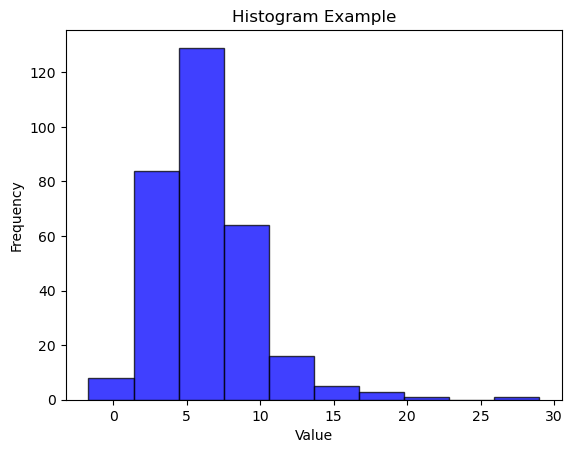

In [47]:
import matplotlib.pyplot as plt
plt.hist(df['Weight_4'], bins=10, alpha=0.75, color='blue', edgecolor='black')

# 그래프 제목과 레이블 추가
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [48]:
first_med_dict ={}
for idx in df.index:
    med_list=[]
    memo_list=[]
    for i in range(1,7):
        if pd.isna(df.loc[idx,f'MedicineName_{i}']) :
            continue
        else:
            med_list= med_list + eval(df.loc[idx,f'MedicineName_{i}'])
            memo_list= memo_list + eval(df.loc[idx,f'Memo_{i}'])
    #print(memo_list)
    first_med = []
    first_memo = []
    for med, memo in zip(med_list,memo_list):
        if 'GambiTab-D' not in med:
            continue
        if memo == '2-1,2':
            first_med.append(med)
            first_med.append(med)
            first_memo.append(memo)
        else:
            first_med.append(med)
            first_memo.append(memo)
        if len(first_med) == 2:
            break
    if len(first_med) == 1:
        first_med.append(first_med[0])
    first_med_dict[idx] = first_med

In [49]:
apedrin_dict = {'GambiTab-D3':80, 'GambiTab-D4':95,'GambiTab-D5':105,'GambiTab-D6':115,'GambiTab-D2X':125,'GambiTab-D3X':135,'GambiTab-DX쎈':145,
                'GambiTab-DLv6':95, 'GambiTab-DLv7':105, 'GambiTab-DLv8':115,'GambiTab-Dx128':125}

In [50]:
apedrin_dict = {idx:{'apedrin1':apedrin_dict[val[0].split('_')[0]],'apedrin2':apedrin_dict[val[1].split('_')[0]]} for idx, val in first_med_dict.items()}

In [51]:
df = pd.concat([df, pd.DataFrame(apedrin_dict).transpose()],axis=1)

In [52]:
med_set = set([med for med_list in first_med_dict.values() for med in med_list])

In [86]:
df

,BMI_1,BMI_2,BMI_3,BMI_4,BMI_5,BMI_6,BMR_1,BMR_2,BMR_3,BMR_4,...,WHR_5,WHR_6,Weight_1,Weight_2,Weight_3,Weight_4,Weight_5,Weight_6,apedrin1,apedrin2
16,30.7,1.5,1.7,NaN,NaN,NaN,1328.0,3.0,14.0,NaN,...,NaN,NaN,75.4,3.7,4.2,NaN,NaN,NaN,95,95
34,29.2,2.2,2.8,NaN,NaN,NaN,1222.0,30.0,-7.0,NaN,...,NaN,NaN,65.1,4.9,6.2,NaN,NaN,NaN,95,105
55,25.5,1.3,NaN,NaN,NaN,NaN,1210.0,8.0,NaN,NaN,...,NaN,NaN,61.6,3.2,NaN,NaN,NaN,NaN,95,105
68,25.7,1.0,2.4,NaN,NaN,NaN,1322.0,16.0,32.0,NaN,...,NaN,NaN,73.0,2.9,6.8,NaN,NaN,NaN,115,115
145,35.0,1.7,3.7,NaN,NaN,NaN,1937.0,81.0,63.0,NaN,...,NaN,NaN,116.6,5.8,12.5,NaN,NaN,NaN,125,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43839,27.2,0.0,1.5,NaN,NaN,NaN,1143.0,-38.0,-21.0,NaN,...,NaN,NaN,63.9,0.0,3.6,NaN,NaN,NaN,95,105
43843,30.1,1.6,NaN,NaN,NaN,NaN,1363.0,1.0,NaN,NaN,...,NaN,NaN,74.7,3.9,NaN,NaN,NaN,NaN,115,125
43848,30.3,1.8,NaN,NaN,NaN,NaN,1304.0,26.0,NaN,NaN,...,NaN,NaN,69.8,4.3,NaN,NaN,NaN,NaN,95,105
43871,31.9,4.6,NaN,NaN,NaN,NaN,1296.0,33.0,NaN,NaN,...,NaN,NaN,82.7,12.0,NaN,NaN,NaN,NaN,115,125


In [87]:
col_1 = [col for col in df.columns if '_1'in col]+['apedrin1', 'apedrin2']
col_1.remove('Memo_1')
col_1.remove('MedicineName_1')

In [88]:
col_date = [col for col in df.columns if 'Date'in col]
col_date.remove('Date_1')
col_date

['Date_2', 'Date_3', 'Date_4', 'Date_5', 'Date_6']

In [91]:
target_date={}
for idx in df.index:
    #imsi = 0 
    #print(period_dict[idx])
    for i, date in enumerate(col_date):
        if pd.isna(df.loc[idx,date]):
            target_date[idx] = [i, imsi]
            if imsi < 50:
                print(period_dict[idx])
                print(target_date[idx])
                print(df_dict[idx])
            break
        else:
            imsi = df.loc[idx,date]
            #print(imsi, date, i)
            if isinstance(imsi, np.float64):            
                if 100 > imsi > 80:
                    target_date[idx] = [i + 1, imsi]
                    break
                else:
                    target_date[idx] = [i + 1, imsi]
    
    print('-'*100)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

In [92]:
len(target_date)

1763

In [93]:
need_cols = ['Weight','BMI','SMM','PBF','SoftLeanMass','FatFreeMass','VFA','WHR','BMR','MaxVital','MinVital','Pulse']
new_cols = [col+'_After' for col in need_cols]

In [94]:
After_dict={}
for idx in target_date.keys():
    After_dict[idx] = {'Period' : target_date[idx][1]}
    num = str(int(target_date[idx][0]+1))
    cols = [col+'_'+num for col in need_cols]
    idx_row = df.loc[idx,cols]
    idx_row.index = new_cols
    After_dict[idx].update(idx_row.to_dict())
    #print(idx_row)

In [95]:
After_df = pd.DataFrame(After_dict).transpose()

In [99]:
min(After_df['Period'])

60.0

In [100]:
dataset = pd.concat([df[col_1],After_df], axis = 1)

In [101]:
dataset['PercentOfLossWeight'] = dataset['Weight_After']*100/dataset['Weight_1']

In [102]:
dataset

,BMI_1,BMR_1,Date_1,FatFreeMass_1,MaxVital_1,MinVital_1,PBF_1,ProgressNote_1,Pulse_1,SMM_1,...,PBF_After,SoftLeanMass_After,FatFreeMass_After,VFA_After,WHR_After,BMR_After,MaxVital_After,MinVital_After,Pulse_After,PercentOfLossWeight
16,30.7,1328.0,2023-03-25 00:00:00,44.4,130.0,79.0,41.2,#비만\n\n여자\n\nㆍ 키/체중/BMI:158 / 75 / 중도 비만(30.04...,68.0,24.3,...,2.6,0.7,0.7,19.3,0.04,14.0,6.0,2.0,-31.0,5.570292
34,29.2,1222.0,2023-09-11 00:00:00,39.4,143.0,87.0,39.4,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:151 / 64 / 경도비만(...,76.0,21.3,...,6.9,-0.3,-0.3,48.1,0.02,-7.0,25.0,14.0,-6.0,9.52381
55,25.5,1210.0,2023-09-02 00:00:00,38.9,103.0,58.0,36.9,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:157 / 60 / 과체중(2...,80.0,20.9,...,2.8,0.4,0.4,20.5,0.00,8.0,-10.0,-19.0,-10.0,5.194805
68,25.7,1322.0,2023-05-20 00:00:00,44.1,124.0,77.0,39.6,#비만\n\n여자\n\nㆍ 키/체중/BMI:169 / 74 / 경도비만(25.909...,90.0,24.0,...,4.0,1.4,1.5,32.2,0.05,32.0,NaN,NaN,NaN,9.315068
145,35.0,1937.0,2024-01-08 00:00:00,72.5,162.0,104.0,37.8,#비만(내원초진)\n\n남자\n\nㆍ 키/체중/BMI:184 / 115 / 중도 비...,71.0,40.8,...,4.7,2.7,2.9,54.1,0.09,63.0,17.0,19.0,-4.0,10.720412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43839,27.2,1143.0,2024-01-15 00:00:00,35.8,144.0,90.0,44.0,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:155 / 64.6 / 경도비...,70.0,19.1,...,5.0,-1.0,-1.0,36.4,0.06,-21.0,23.0,10.0,-9.0,5.633803
43843,30.1,1363.0,2024-01-17 00:00:00,46.0,149.0,104.0,38.4,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:159 / 75 / 경도비만(...,82.0,25.2,...,3.3,0.1,0.1,28.7,0.05,1.0,-6.0,3.0,1.0,5.220884
43848,30.3,1304.0,2024-01-16 00:00:00,43.2,157.0,96.0,38.1,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:160 / 66 / 경도비만(...,71.0,23.6,...,2.3,1.2,1.2,20.8,0.03,26.0,19.0,16.0,-11.0,6.160458
43871,31.9,1296.0,2024-01-22 00:00:00,42.9,137.0,93.0,48.2,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:160 / 80 / 중도 비만...,97.0,23.3,...,6.7,1.4,1.5,62.0,0.11,33.0,11.0,13.0,-4.0,14.510278


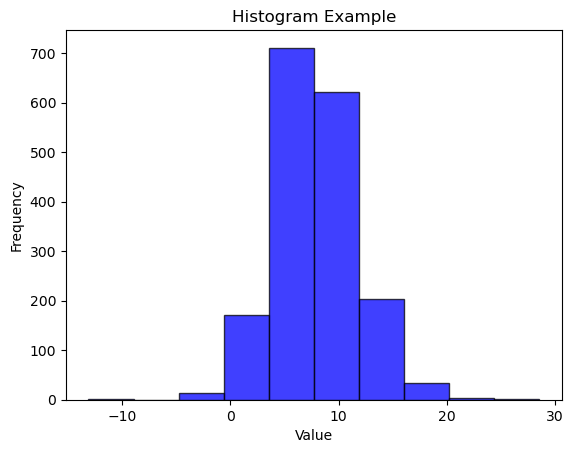

In [103]:
import matplotlib.pyplot as plt
plt.hist(dataset['PercentOfLossWeight'], bins=10, alpha=0.75, color='blue', edgecolor='black')

# 그래프 제목과 레이블 추가
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [104]:
info_df = pd.DataFrame(info_data).transpose()
info_df

,Age,PatientSex,Height,Coffee_기타,Coffee_마시지않음,Coffee_없음,Coffee_있음,Alcohol_거의 마시지 않는다 (월 1-2회),Alcohol_기타,Alcohol_주 1회,Alcohol_주 2회 이상,HanbangX,HanbangYX,HanbangYY,YangbangX,YangbangYX,YangbangYY
16,60.0,2,158.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
34,64.0,2,151.0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
55,31.0,2,157.0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
68,32.0,2,169.0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
145,36.0,1,184.0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43839,59.0,2,155.0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
43843,60.0,2,159.0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
43848,59.0,2,160.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
43871,30.0,2,160.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [105]:
dataset = pd.concat([info_df, dataset], axis = 1)

In [106]:
BF.save_excel(dataset, '체중감량 예측모델 데이터셋')
BF.save_csv(dataset, '체중감량 예측모델 데이터셋')